# Categorical Plot系
- `sns.catplot()`で書くやり方と、`sns.~~~plot()`で書くやり方がある。
- `catplot()`だと`hue`以外に`col`引数でも分離できて便利
- ただし`catplot()`だと`ax`引数が無い(figure-level functionらしい）ため`plt.subplots()`で並べられない。その代わり上記のようにfigサイズが状況に応じて変わったり、１種類のグラフを`col`で分割して並べたりできる。
- `catplot()`は昔`factorplot()`という関数で、今も残っているが使わない方がいい。
- 引数としては、`(data=df, x='col1', y='col2')`という方法と、`(x=df[col1], y=df[col2])`という方法があるが、`catplot()`の場合は後者はエラーになる。公式ドキュメントを見ても前者の作法が正しいようである。

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## `sns.stripplot()` ストリップチャート
- 正直見づらいからあまり使わないと思われる

<AxesSubplot:xlabel='pclass', ylabel='age'>

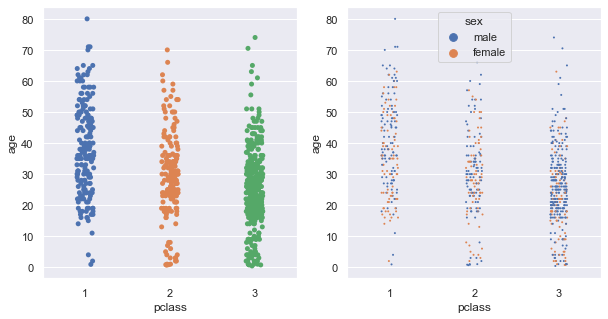

In [58]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))
sns.stripplot(data=titanic, x='pclass', y='age', ax=a1)
sns.stripplot(data=titanic, x='pclass', y='age', hue='sex', size=2, ax=a2)

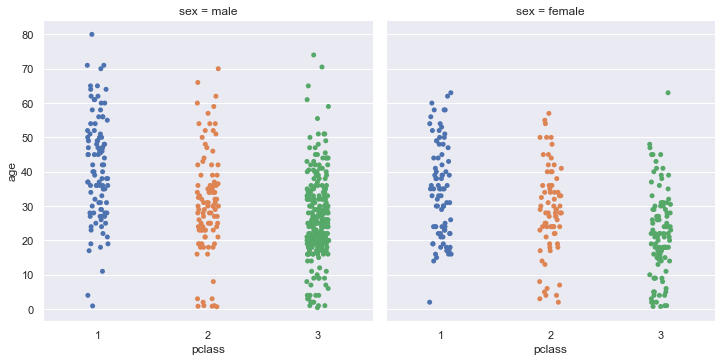

In [59]:
sns.catplot(data=titanic, x='pclass', y='age', col='sex', kind='strip')

## `sns.swarmplot()` スウォームチャート
- たまに見る。お洒落
- `sns.swarmplot(data, x, y)`
- `sns.catplot(data, x, y, kind='swarm')`

/Users/yuya/.local/share/virtualenvs/test36--SgIQ7cC/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pclass', ylabel='age'>

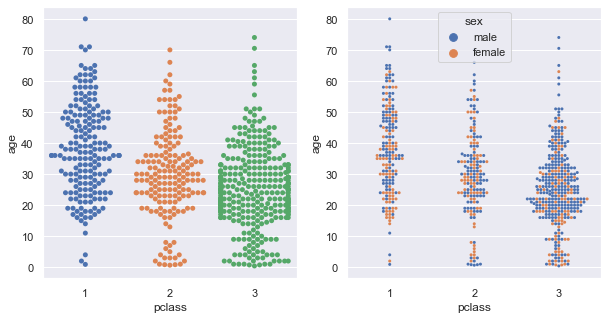

In [61]:
f, axs = plt.subplots(1, 2, figsize=(10,5))
sns.swarmplot(data=titanic, x='pclass', y='age', ax=axs[0])
sns.swarmplot(data=titanic, x='pclass', y='age', hue='sex', size=3 ,ax=axs[1])

/Users/yuya/.local/share/virtualenvs/test36--SgIQ7cC/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


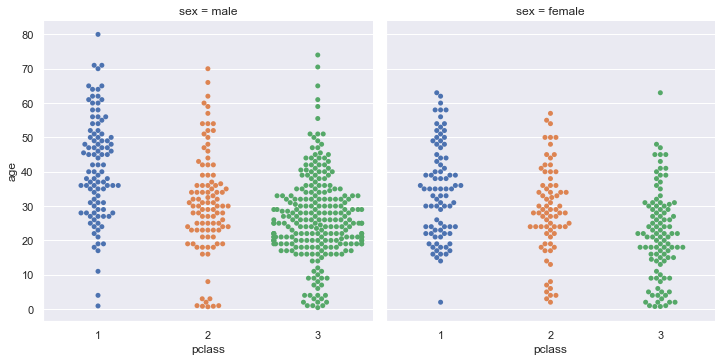

In [63]:
sns.catplot(data=titanic, x='pclass', y='age', col='sex', kind='swarm')

## `sns.boxplot` 箱髭図
- 第二、第三四分位で箱を書き、最大値と最小値までバーを出す
- ただし第二、第三四分位から1.5IQRより外は外れ値表示（変えられる）
- `sns.boxplot(x,y,data)`
- `sns.cotplot(x,y,data,kind='box')`

<AxesSubplot:xlabel='pclass', ylabel='age'>

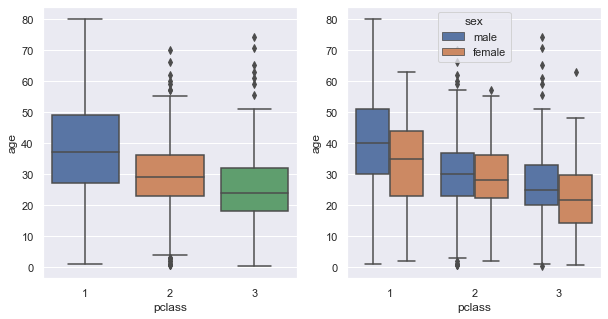

In [64]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))
sns.boxplot(data=titanic, x='pclass', y='age', ax=a1)
sns.boxplot(data=titanic, x='pclass', y='age', hue='sex',  ax=a2)

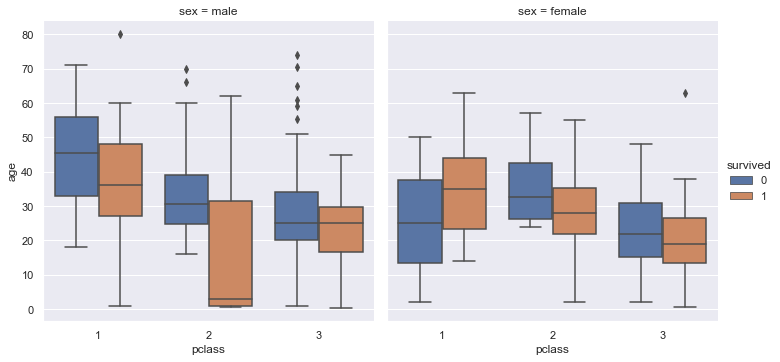

In [67]:
sns.catplot(data=titanic, kind='box', x='pclass', y='age', hue='survived', col='sex')

## `sns.violinplot()` バイオリン図
- 箱髭図とスウォームチャートの合体版
- 中に箱髭図もどきが入っていて、外側はswarmを滑らかに近似した線が引かれる

<AxesSubplot:xlabel='pclass', ylabel='age'>

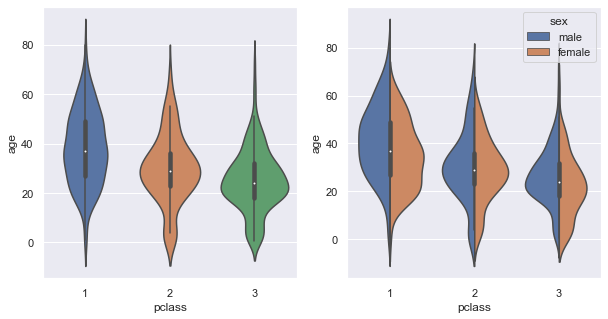

In [69]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(10,5))
sns.violinplot(data=titanic, x='pclass', y='age', ax=a1)
sns.violinplot(data=titanic, x='pclass', y='age', hue='sex', split=True, ax=a2)

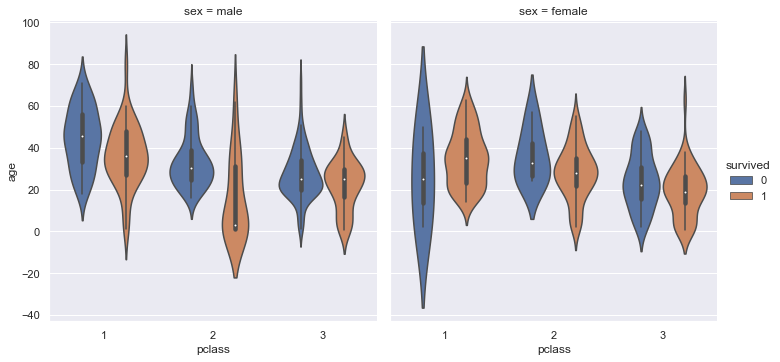

In [35]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin', hue='survived',col='sex')

## `sns.boxenplot()` boxen plot (letter value plot)
- 箱髭図のバー部分の情報が落ちすぎている場合に使用。

<AxesSubplot:xlabel='pclass', ylabel='age'>

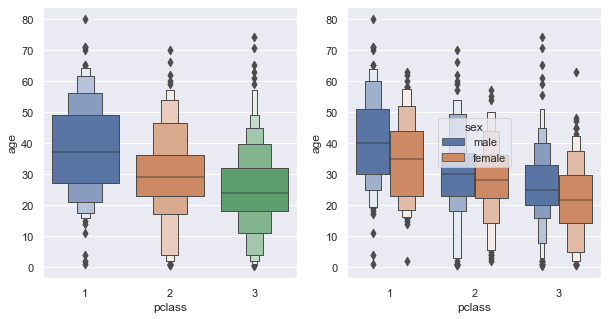

In [72]:
f, (a1, a2) = plt.subplots(1, 2, figsize=(10, 5))
sns.boxenplot(data=titanic, x='pclass', y='age', ax=a1)
sns.boxenplot(data=titanic, x='pclass', y='age', hue='sex', ax=a2, )

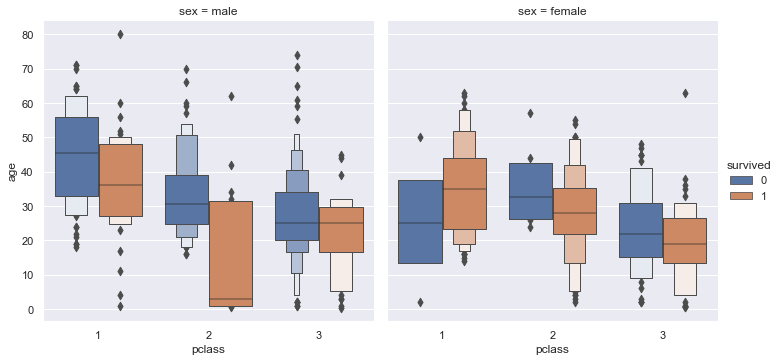

In [38]:
sns.catplot(data=titanic, x='pclass', y='age', kind='boxen', hue='survived', col='sex')

## point plot
- **折れ線ではなく**x軸はカテゴリなので注意
- 平均と信頼区間をプロットし、並んだカテゴリをつなぐ
- あまり使う気がしない

<AxesSubplot:xlabel='pclass', ylabel='age'>

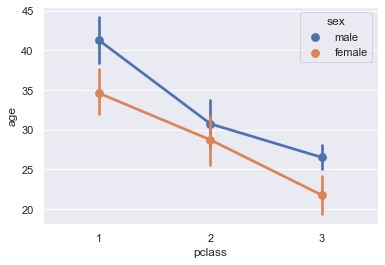

In [39]:
sns.pointplot(data=titanic, x='pclass', y='age', hue='sex')

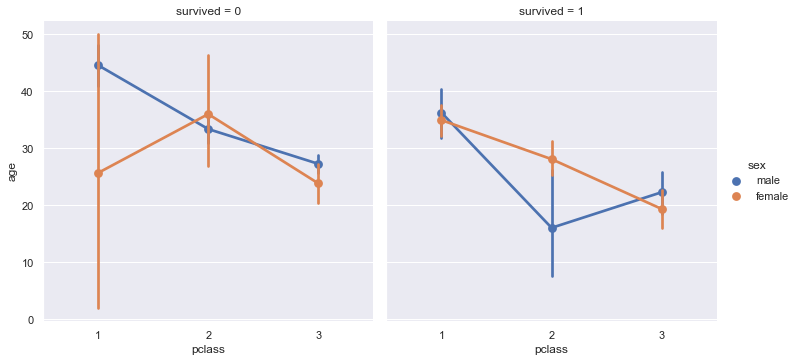

In [40]:
sns.catplot(data=titanic, x='pclass', y='age', hue='sex', col='survived', kind='point')

## barplot (棒グラフ）
- 平均を高さとするバー
- ブートストラップ信頼区間

<AxesSubplot:xlabel='pclass', ylabel='age'>

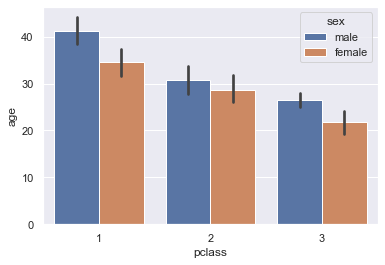

In [41]:
sns.barplot(data=titanic, x='pclass', y='age', hue='sex')

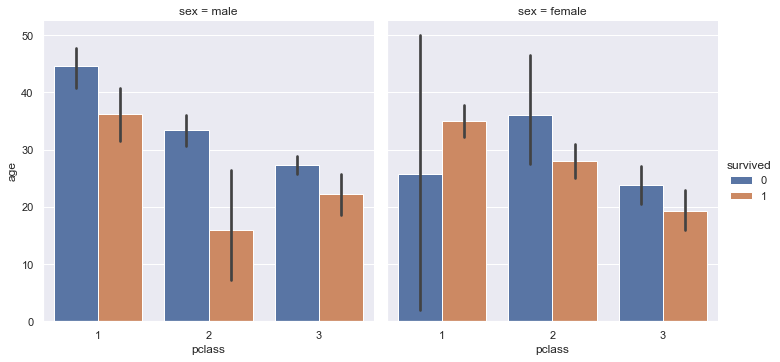

In [42]:
sns.catplot(kind='bar', data=titanic, x='pclass', y='age', hue='survived', col='sex')

## count plot
- カテゴリに対してデータ数をカウントする

<AxesSubplot:xlabel='pclass', ylabel='count'>

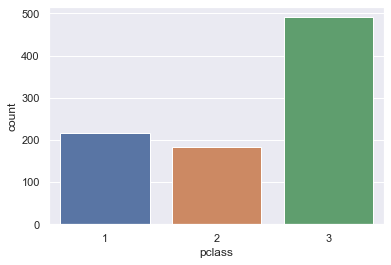

In [43]:
sns.countplot(data=titanic, x='pclass')

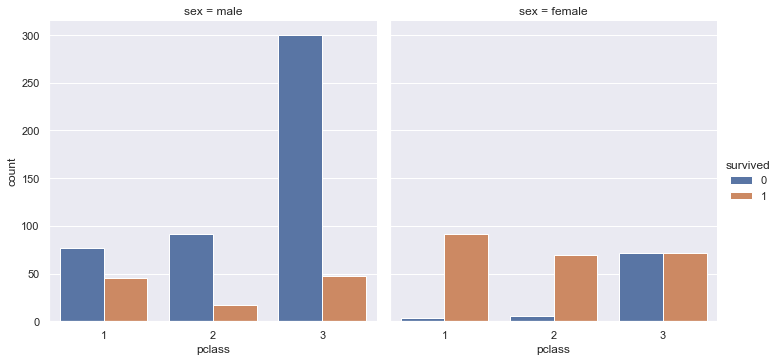

In [44]:
sns.catplot(kind='count', data=titanic, x='pclass', hue='survived', col='sex')